코랩 사용해보기!
- 인터넷만 있으면 가능한 굉장히 유용한 사이트

### 목표
- 학생 성적 데이터를 인공신경만 모델로 학습시켜보자
- keras 활용법 알아보기!

In [2]:
!ls # 현재 폴더의 내부

drive  sample_data


In [3]:
!pwd  # 현재 작업중인 경로

/content


In [4]:
%cd ./drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
!pwd 

/content/drive/MyDrive/Colab Notebooks


### 데이터 로딩

In [5]:
import pandas as pd

In [6]:
# 구분자 ';'로 구분되어 데이터가 저장되어 있음
studentData =pd.read_csv('./data/student-mat.csv', delimiter=';')

In [ ]:
studentData

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
studentData.head()

### 문제와 답 분리

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x = studentData['studytime']
y = studentData['G3'] #final grade


In [9]:
studentData['G3'] #최종성적, 정답으로쓸 FINAL GRADE

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [10]:
studentData['studytime'] # 주마다 공부한시간

0      2
1      2
2      2
3      3
4      2
      ..
390    2
391    1
392    1
393    1
394    1
Name: studytime, Length: 395, dtype: int64

In [11]:
x.shape, y.shape

((395,), (395,))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=0)

### 신경망 모델 만들기
 - 1. 신경망 구조 설계
 - 2. 신경망 모델 학습(loss, optimizer), 평가(metrics) 방법 설정
 - 3. 학습 및 평가과정 시각화
 - 4. 모델 평가

In [14]:
from tensorflow.keras import Sequential  #모델을 쌓을 뼈대
from tensorflow.keras.layers import InputLayer, Dense  # InputLayer-데이터가 들어올 층,Dense - 쌓을모델

In [31]:
# 1. 신경망 구조 설계
model = Sequential()  # 딥러닝 모델을 구성하는 뼈대


model.add(InputLayer(input_shape=(1,)))   #입력층 설정

# (입력되는 데이터, 학습시킬 x트레인데이터가 몇개인지 설정할수있는 층
#학습시킬 데이터의 크기,
#input_shape 들어올 데이터의 개수파악

#학습시킬데이터의 특성의 개수, x는 문제데이터, y 정답데이터
#문제데이터는 한개)

model.add(Dense(units=9)) #뉴런층 설정
model.add(Dense(units=9)) 
model.add(Dense(units=9)) 

model.add(Dense(units=1)) #출력층 설정


In [32]:
# 2 신경망 학습/평가 방법 설정
model.compile(loss='mean_squared_error',
              optimizer='SGD')                    #경사하강법으로 보겠다

In [ ]:
# 모델 학습 및 학습과정 시각화
studentHistory = model.fit(X_train, y_train, epochs=100)

In [34]:
import matplotlib.pyplot as plt #시각화

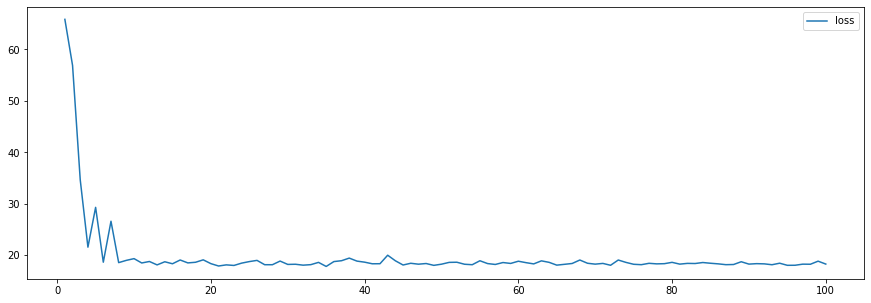

In [35]:
plt.figure(figsize=(15,5))
plt.plot(range(1,101),
         studentHistory.history['loss'],
         label='loss')
plt.legend()
plt.show()

In [35]:
#학습시키면서 오차가 최소화되게 찾아감


In [36]:
# 4. 모델 평가
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 35.1321


35.132102966308594